# Predictive Modeling

### Objective
In this project, I am going to create a predictive model that will help start up companies predict how much funding they will get based on the funding round and company's valuation. This will give them more confidence and save them cosulting expenses on deciding the amount of money they will get from investors. 
The data is from kaggle and originally published by Crunchbase. Informations found in this dataset are dated up to 2013. 

In [1]:
# importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## Loading Data

In [2]:
# using pandas to read csv file from working directory

data = pd.read_csv('funding_rounds.csv')
data.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


## Data Exploration and Cleaning

In [3]:
# Selecting features I want to work with

data1 = data[['is_first_round',
      'funding_round_code','pre_money_valuation_usd', 
      'post_money_valuation_usd','raised_amount_usd']]
data1.head()

,is_first_round,funding_round_code,pre_money_valuation_usd,post_money_valuation_usd,raised_amount_usd
0,0,b,0.0,0.0,8500000.0
1,0,angel,0.0,0.0,500000.0
2,0,a,115000000.0,0.0,12700000.0
3,0,b,525000000.0,0.0,27500000.0
4,0,b,0.0,0.0,10500000.0


In [4]:
# finding out features with null values

data1.isnull().sum()

is_first_round              0
funding_round_code          0
pre_money_valuation_usd     0
post_money_valuation_usd    0
raised_amount_usd           0
dtype: int64

In [5]:
# number of rows and columns in the dataset
data1.shape

(52928, 5)

In [6]:
# finding out different types of fund rounds and their counts

data1.groupby('funding_round_code').size()

funding_round_code
a                    7999
angel                3239
b                    4892
c                    2499
convertible           187
crowd                 111
crowd_equity            3
d                    1129
debt_round           3409
e                     430
f                     145
g                      13
grant                 776
partial              3115
post_ipo_debt           7
post_ipo_equity        80
private_equity       1043
secondary_market       16
seed                11608
unattributed        12227
dtype: int64

I am interested in seed, a, b and c rounds since I am helping startups

In [7]:
# Selecting rows with seed, a, b or c as the funding round code
# viewing number of rows and columns left
data2 = data1[data1.funding_round_code.isin(['c', 'b', 'a','seed']) == True]

data2.shape

(26998, 5)

In [8]:
# selected fund rounds and their respective counts
data2.groupby('funding_round_code').size()

funding_round_code
a        7999
b        4892
c        2499
seed    11608
dtype: int64

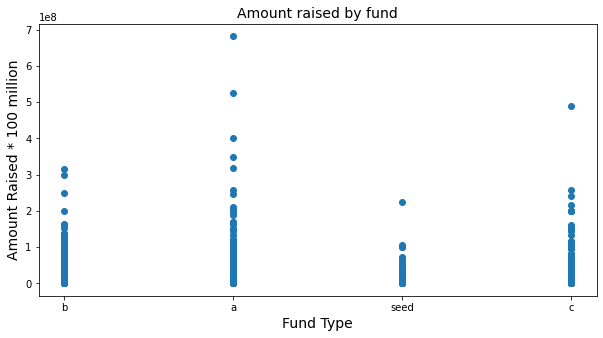

In [9]:
# Using a plot to gain insight on the amounts each round raised

plt.figure(figsize = (10,5))

fund = data2['funding_round_code']
amount = data2['raised_amount_usd']

plt.scatter(fund, amount)
 
plt.xlabel("Fund Type", fontsize = 14)
plt.ylabel("Amount Raised * 100 million", fontsize = 14)
plt.title("Amount raised by fund", fontsize = 14)
plt.show()

We can see from the plot above that the seed round round has the least maximum raised amount which makes sense since it is the first round of funding a startup will have to go through

In [10]:
# Let's see averages for each fund

pd.options.display.float_format = '{:.2f}'.format

avg_fund = data2.groupby('funding_round_code').mean().reset_index()
avg_fund

,funding_round_code,is_first_round,pre_money_valuation_usd,post_money_valuation_usd,raised_amount_usd
0,a,0.52,26453.31,269998.82,6504186.58
1,b,0.50,221361.41,831845.89,11344490.29
2,c,0.48,6170468.19,4465586.33,17666920.19
3,seed,0.69,430.74,157257.43,671146.20


We can see from the table above that the seed round has has the lowest average post money valuation followed by round a, b, then c. That makes sense since the size of the company is expected to grow simultaneously with these rounds. 

In [11]:
# turning the funding round code feature in to numerical for predictions
dummies = pd.get_dummies(data2.funding_round_code)

dummies.head()

,a,b,c,seed
0,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0
5,1,0,0,0


In [12]:
# Adding the the newly created columns to the data

data3 = pd.concat([data2, dummies], axis = 'columns')
data3.head()

,is_first_round,funding_round_code,pre_money_valuation_usd,post_money_valuation_usd,raised_amount_usd,a,b,c,seed
0,0,b,0.00,0.00,8500000.00,0,1,0,0
2,0,a,115000000.00,0.00,12700000.00,1,0,0,0
3,0,b,525000000.00,0.00,27500000.00,0,1,0,0
4,0,b,0.00,0.00,10500000.00,0,1,0,0
5,0,a,8500000.00,10000000.00,1500000.00,1,0,0,0


In [13]:
# removing funding_round_type feature from the dataset since it is no longer needed

data4 = data3.drop(['funding_round_code'], axis =1)
data4.head()

,is_first_round,pre_money_valuation_usd,post_money_valuation_usd,raised_amount_usd,a,b,c,seed
0,0,0.00,0.00,8500000.00,0,1,0,0
2,0,115000000.00,0.00,12700000.00,1,0,0,0
3,0,525000000.00,0.00,27500000.00,0,1,0,0
4,0,0.00,0.00,10500000.00,0,1,0,0
5,0,8500000.00,10000000.00,1500000.00,1,0,0,0


In [14]:
# removing any row where rounds a,b,c and seed are equal to 0 
# since we are using atleast one of those for prediction
index = data4[(data4['a'] == 0) & 
              (data4['b'] == 0) & 
              (data4['c'] == 0) &
             (data4['seed'] == 0)].index

data5 = data4.drop(index)

data5.shape

(26998, 8)

In [15]:
# renaming a, b and c to series a, b and c

data5.rename(columns = {'a': 'series_a', 'b': 'series_b', 'c': 'series_c'}, inplace = True)
data5.head()

,is_first_round,pre_money_valuation_usd,post_money_valuation_usd,raised_amount_usd,series_a,series_b,series_c,seed
0,0,0.00,0.00,8500000.00,0,1,0,0
2,0,115000000.00,0.00,12700000.00,1,0,0,0
3,0,525000000.00,0.00,27500000.00,0,1,0,0
4,0,0.00,0.00,10500000.00,0,1,0,0
5,0,8500000.00,10000000.00,1500000.00,1,0,0,0


If we look at the data table above we will notice rows where both post and pre money valuation are 0.
Start-ups rarely get funded without some sort of valuation.
We'll go ahead and remove rows where both post and pre money valuation are 0.

In [16]:
# removing rows where pre and post money valuation are 0

index = data5[(data5['post_money_valuation_usd'] == 0.0) & (data5['pre_money_valuation_usd'] == 0.0)].index

data6 = data5.drop(index)

data6.head()

,is_first_round,pre_money_valuation_usd,post_money_valuation_usd,raised_amount_usd,series_a,series_b,series_c,seed
2,0,115000000.00,0.00,12700000.00,1,0,0,0
3,0,525000000.00,0.00,27500000.00,0,1,0,0
5,0,8500000.00,10000000.00,1500000.00,1,0,0,0
6,0,100000000.00,110000000.00,10000000.00,0,1,0,0
13,0,0.00,17500000.00,3710000.00,1,0,0,0


In [17]:
# Let's see how many rows of data we have left
data6.shape

(781, 8)

A lot of data have been cut off due to not having a pre or post money valuation.
We do not need those data since we are trying to predict how much money can be raised baised on valuation.


In [18]:
# Lets see how many 0s pre money valuation has
print (len(data6[data6['pre_money_valuation_usd'] == 0.0]))

760


Pre money valuation has a lot of zeros in it.
This means that companies do not use or get funded too much based on pre money valuation

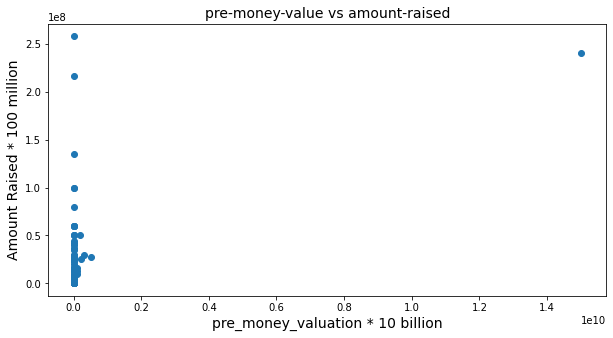

In [19]:
# Plotting a graph to see relationship between pre-money and amount raised 
plt.figure(figsize = (10,5))

val = data6['pre_money_valuation_usd']
amount = data6['raised_amount_usd']

plt.scatter(val, amount)

plt.xlabel("pre_money_valuation * 10 billion", fontsize = 14 )
plt.ylabel("Amount Raised * 100 million", fontsize = 14)
plt.title('pre-money-value vs amount-raised', fontsize = 14)
plt.show()

Saw in the graph that a lot of money that was raised had no pre money valuation.
That means most of the funders invest based on post money valuation

In [20]:
# dropping the pre money valuation column 

data7 = data6.drop(['pre_money_valuation_usd'], axis = 1)
data7.head()

,is_first_round,post_money_valuation_usd,raised_amount_usd,series_a,series_b,series_c,seed
2,0,0.00,12700000.00,1,0,0,0
3,0,0.00,27500000.00,0,1,0,0
5,0,10000000.00,1500000.00,1,0,0,0
6,0,110000000.00,10000000.00,0,1,0,0
13,0,17500000.00,3710000.00,1,0,0,0


In [21]:
# Lets see how many 0s post money valuation and raised amount has

print (len(data7[data7['post_money_valuation_usd'] == 0.0]) )
print (len(data7[data7['raised_amount_usd'] == 0.0]))

12
22


In [22]:
# removing rows where post money valuation and raised amount is 0

index = data7[(data7['post_money_valuation_usd'] == 0.0) | (data7['raised_amount_usd'] == 0.0)].index

data8 = data7.drop(index)

print (len(data8[data8['post_money_valuation_usd'] == 0.0]))
print (len(data8[data8['raised_amount_usd'] == 0.0]))

0
0


In [23]:
# Lets see how many rows have values where post money valuation is less than raised amount

print (len(data8[data8['post_money_valuation_usd'] < data8['raised_amount_usd']]) )

25


25 rows have values where post money valuation is less than raised amount. Those are errors we need to remove.
The amount raised cannot be more than the valuation of the firm.

In [24]:
# removing rows where valuation is less than raised amount 

index = data8[(data8['post_money_valuation_usd'] < data8['raised_amount_usd'])].index

data9 = data8.drop(index)

data9.head()

,is_first_round,post_money_valuation_usd,raised_amount_usd,series_a,series_b,series_c,seed
5,0,10000000.00,1500000.00,1,0,0,0
6,0,110000000.00,10000000.00,0,1,0,0
13,0,17500000.00,3710000.00,1,0,0,0
18,0,7500000.00,3800000.00,1,0,0,0
19,0,33500000.00,8500000.00,0,1,0,0


In [25]:
data9.shape

(723, 7)

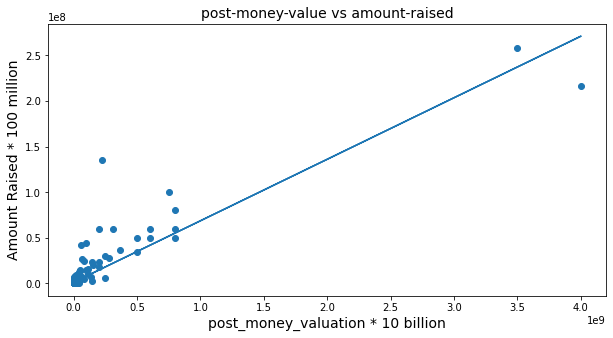

In [26]:
# Graphing relationship between post money and raised amount to look for outliers

plt.figure(figsize = (10,5))

val = data9['post_money_valuation_usd']
amount = data9['raised_amount_usd']

plt.scatter(val, amount)

m, b = np.polyfit(val, amount, 1)
plt.plot(val, m*val + b)

plt.xlabel("post_money_valuation * 10 billion", fontsize = 14)
plt.ylabel("Amount Raised * 100 million" , fontsize = 14)
plt.title('post-money-value vs amount-raised', fontsize = 14)
plt.show()

There were some outliers in the graph above and I want to remove outiers so the model can make better predictions.

Since most startups' valuation do not exceed 125 million, and it's advisable that their amount raised per round should not exceed 25% of their valuation, I am going to remove rows where post_money_valuation is more than 125 million and the rows where raised_amount is more than 30 million



In [27]:
# removing rows where post_money_valuation_usd is more and 200 million
# and raised_amount_usd is more than 50 million
data10 = data9.drop(data9[(data9['post_money_valuation_usd']>125_000_000) |  
                          (data9['raised_amount_usd']> 30_000_000)].index)
data10.shape

(698, 7)

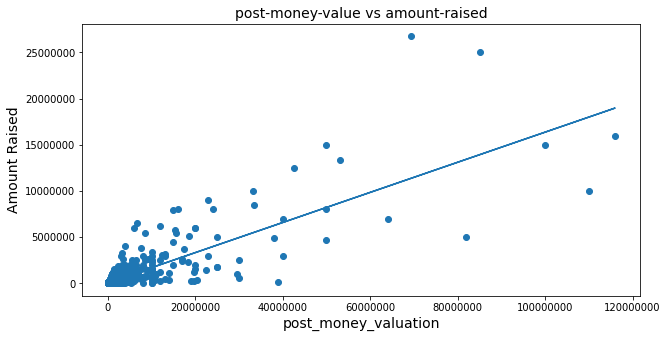

In [28]:
# plotting the post-money-value vs amount-raised graph again

plt.figure(figsize = (10,5))

val = data10['post_money_valuation_usd']
amount = data10['raised_amount_usd']

plt.scatter(val, amount)

m, b = np.polyfit(val, amount, 1)
plt.plot(val, m*val + b)

plt.ticklabel_format(style='plain')

plt.xlabel("post_money_valuation", fontsize = 14)
plt.ylabel("Amount Raised", fontsize = 14)
plt.title('post-money-value vs amount-raised', fontsize = 14)

plt.show()

We can see from the graph that there are no extreme outliers and the relasionship between valuation and raised amount is positive.

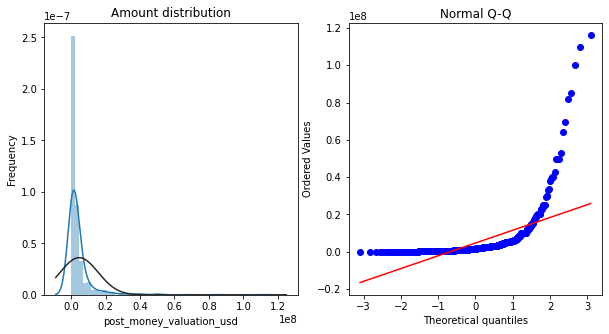

In [29]:
# let's graph the distribution of post money valuation

from scipy import stats
from scipy.stats import norm


plt.figure(figsize = (10,5))

skew = data10['post_money_valuation_usd']

plt.subplot(1, 2, 1)
sns.distplot(skew, fit = norm)
plt.ylabel('Frequency')
plt.title('Amount distribution')

plt.subplot(1, 2, 2)
stats.probplot(skew, plot=plt)
plt.title('Normal Q-Q')

plt.show()

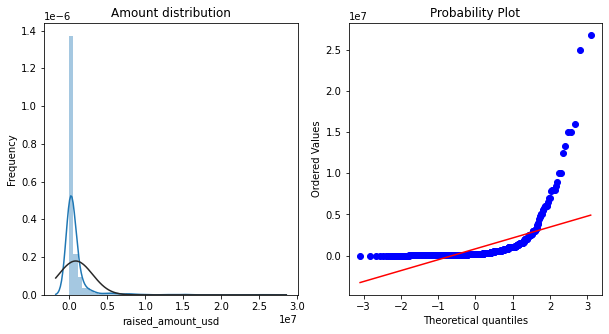

In [30]:
# let's graph the distribution of amount rainsed

plt.figure(figsize = (10,5))

skew = data10['raised_amount_usd']

plt.subplot(1, 2, 1)
sns.distplot(skew, fit = norm)
plt.ylabel('Frequency')
plt.title('Amount distribution')

plt.subplot(1, 2, 2)
stats.probplot(skew, plot=plt)

plt.show()

Post money valuation and raised amount values are not normally distributed and working with linear regression, we need to make sure our values are normally distributed and values form a linear line on the normal plot in order to make better predictions. 
So I am going to normalize both variables by using the log of their values. 

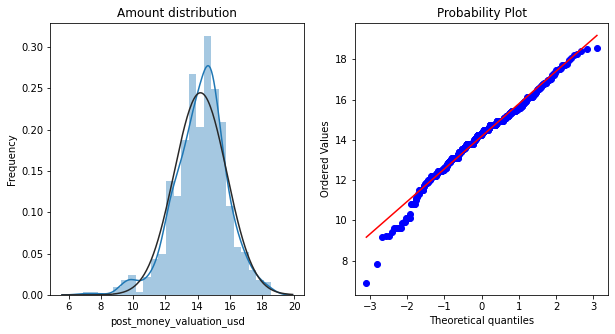

In [31]:
# let's graph the distribution of post money valuation after taking log of values

plt.figure(figsize = (10,5))

log_post = np.log(data10['post_money_valuation_usd'])

plt.subplot(1, 2, 1)
sns.distplot(log_post, fit = norm)
plt.ylabel('Frequency')
plt.title('Amount distribution')


plt.subplot(1, 2, 2)
stats.probplot(log_post, plot=plt)

plt.show()

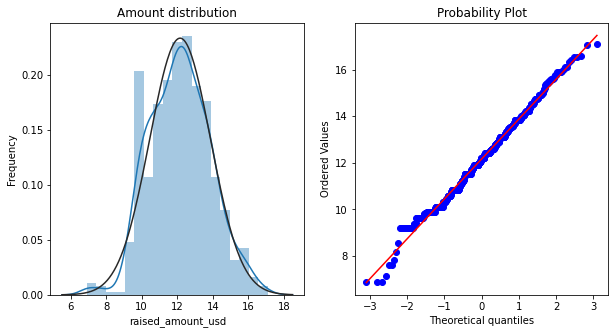

In [32]:
# let's graph the distribution of raised amount after taking log of values


plt.figure(figsize = (10,5))

log_raised = np.log(data10['raised_amount_usd'])

plt.subplot(1, 2, 1)
sns.distplot(log_raised, fit = norm)
plt.ylabel('Frequency')
plt.title('Amount distribution')

plt.subplot(1, 2, 2)
stats.probplot(log_raised, plot=plt)

plt.show()

As we can see, both variables are some what better distributed now than before even though they are still not perfectly distributed.

<AxesSubplot:>

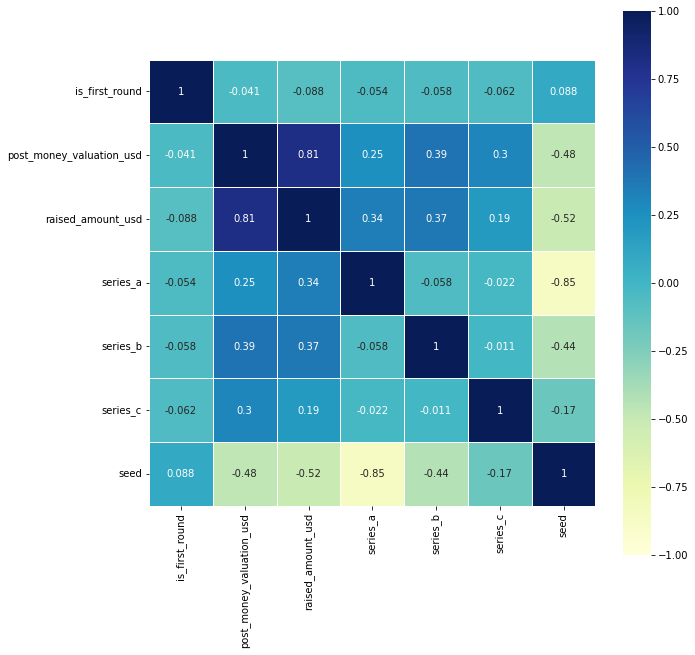

In [33]:
# Finding feature correlation 
corr = data10.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,vmin=-1, vmax=1, linewidths=0.5,square=True,annot=True, cmap="YlGnBu")

is_first_round has almost no correlation with raised_amount making the worst for predicting raised amount.
Post_money_valuation has the best correlation with raised_amount making the best feature for predicting raised amount.

In [34]:
# dropping is_first_round from dataset

data11 = data10.drop(['is_first_round'], axis = 1)
data11.head()

,post_money_valuation_usd,raised_amount_usd,series_a,series_b,series_c,seed
5,10000000.00,1500000.00,1,0,0,0
6,110000000.00,10000000.00,0,1,0,0
13,17500000.00,3710000.00,1,0,0,0
18,7500000.00,3800000.00,1,0,0,0
19,33500000.00,8500000.00,0,1,0,0


## Spliting Data

In [35]:
# Assigning Dependent variable y and predictors X
X = data11.drop(['raised_amount_usd'], axis = 1)
y = data11['raised_amount_usd']
print(X.shape,y.shape)

(698, 5) (698,)


In [36]:
# using log of raised_amount and log of post_money_valuation to train the model
y = np.log(y)
X['post_money_valuation_usd'] = np.log(X['post_money_valuation_usd'])

In [51]:
# first 5 values of post_money_valuation after taking its log
X.head()

,post_money_valuation_usd,series_a,series_b,series_c,seed
5,16.12,1,0,0,0
6,18.52,0,1,0,0
13,16.68,1,0,0,0
18,15.83,1,0,0,0
19,17.33,0,1,0,0


In [52]:
# first 5 values of raised_amount after taking its log
y.head()

5    14.22
6    16.12
13   15.13
18   15.15
19   15.96
Name: raised_amount_usd, dtype: float64

In [57]:
# Spliting dataset into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(558, 5) (140, 5) (558,) (140,)


Train size is 80% of dataset which is 558 and test size is 20% which is 140 

## Model Training

In [59]:
# Training the model using linear regression 
# using mean squared error for evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

model1 = LinearRegression()
model1.fit(X_train, y_train)

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)

error = -cross_val_score(model1, X, y, scoring="neg_mean_squared_error", cv = cv)

print('mse = ', error.mean())    

mse =  1.1582410554878377


In [61]:
# Training the model using Lasso regression
# using mean squared error for evaluation

from sklearn.linear_model import Lasso

model2 = Lasso()
model2.fit(X_train, y_train)

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
error = -cross_val_score(model2, X, y, scoring="neg_mean_squared_error", cv = cv)

print('mse = ', error.mean())

mse =  1.6240269767363973


In [60]:
# Training the model using ElasticNet regression
# using mean squared error for evaluation

from sklearn.linear_model import ElasticNet


model3 = ElasticNet()
model3.fit(X_train, y_train)

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)

error = -cross_val_score(model2, X, y, scoring="neg_mean_squared_error", cv = cv)

print('mse = ', error.mean())

mse =  1.6240269767363973


As we can see from the evaluation scores of each model, Linear regression has the least mean squared error which means that it has the best accuracy of predicting raised funds. 
That is the model we are going to use.

## Testing Model

In [62]:
# reverting the logged test values back to normal values for prediction
y_test = np.exp(y_test)
X_test['post_money_valuation_usd'] = np.exp(X_test['post_money_valuation_usd'])

In [63]:
# normal values

y_test.head()

34829   1000000.00
32415    350000.00
29863     50000.00
36436     25000.00
29485    100000.00
Name: raised_amount_usd, dtype: float64

In [64]:
#normal values

X_test.head()

,post_money_valuation_usd,series_a,series_b,series_c,seed
34829,1000000.00,0,0,0,1
32415,5400000.00,0,0,0,1
29863,500000.00,0,0,0,1
36436,2500000.00,0,0,0,1
29485,1000000.00,0,0,0,1


In [78]:
# lets test the model using the test dataset
# and using root mean squared error to evaluate
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score 



pred = model1.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, pred))
rmse

9855114.715286326

In [79]:
# Save as pickle file

import pickle
with open('Fund_prediction.pickle', 'wb') as file:
    pickle.dump(model1, file)
    